### LAB 10 : Create the Model Evaluation for a Real life Training data Set Stored as a .CSV file and by Computing Accuracy for different Model Proposed the Best suitable Machine Learning Algorithm

In [53]:
# import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

In this dataset, you will find 1698 Bollywood movies filmed in the Hindi language that was released all across the Indian subcontinent from a thirteen-year period during the years 2005-2017.. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Movie Name    | The title of the movie                                            |
| Release Period     | Indicates whether the movie was released during a holiday period or under normal circumstances                                                    |
| Whether Remake          | Specifies if the movie is a remake of a previous film |
| Whether Franchise | Indicates if the movie is part of a franchise                                         |
| Genre       | The category or type of the movie, such as suspense, drama, thriller, comedy, etc             |
| New Actor            | Indicates if the movie features a new actor who wasn't previously well-known                                                                     |
| New Director     | Specifies if the movie is directed by someone who is relatively new or lesser-known                                                                |
| New Music Director        | Indicates if the movie's music is composed by a new or lesser-known music director                                                               |
| Lead Star    |The main actor or actress playing the primary role in the movie
|
|Director| The person responsible for directing the movie|
|Music Director|The individual responsible for composing the music for the movie |
|Number of Screens|The total count of cinema screens the movie was released on |
|Revenue(INR)|The total revenue generated by the movie in Indian Rupees (INR)|
|Budget(INR)|The budget of the movie in Indian Rupees (INR)|

In [54]:
# import Dataset
df = pd.read_csv('Bollywood.csv')
df.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


## EDA Steps

In [55]:
# Dimension of Dataset
df.shape

(1698, 14)

In [56]:
# Attribute of Dataset
df.columns

Index(['Movie Name', 'Release Period', 'Whether Remake', 'Whether Franchise',
       'Genre', 'New Actor', 'New Director', 'New Music Director', 'Lead Star',
       'Director', 'Music Director', 'Number of Screens', 'Revenue(INR)',
       'Budget(INR)'],
      dtype='object')

In [57]:
# info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          1698 non-null   object
 1   Release Period      1698 non-null   object
 2   Whether Remake      1698 non-null   object
 3   Whether Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New Actor           1698 non-null   object
 6   New Director        1698 non-null   object
 7   New Music Director  1698 non-null   object
 8   Lead Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music Director      1698 non-null   object
 11  Number of Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB


In [58]:
# Description of Dataset
df.describe()

,Number of Screens,Revenue(INR),Budget(INR)
count,1698.000000,1.698000e+03,1.698000e+03
mean,553.831567,1.501674e+08,2.377287e+08
std,782.951839,2.434838e+08,6.134398e+08
min,1.000000,3.250000e+05,7.250000e+03
25%,30.000000,1.500000e+07,1.150000e+06
50%,200.000000,5.500000e+07,1.240000e+07
75%,800.000000,1.900000e+08,1.778325e+08
max,4600.000000,2.100000e+09,8.016120e+09


In [59]:
# Description of Object Attribute
df.describe(include = 'object')

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director
count,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698
unique,1695,2,2,2,14,2,2,2,764,1048,630
top,Aatma,Normal,No,No,drama,No,No,No,Akshay Kumar,Ram Gopal Verma,Pritam
freq,2,1064,1627,1616,639,1243,882,1144,48,18,92


## Detail Data Description 

In [60]:
# Create a new column 'Top_50_Club' in the DataFrame 'df' which indicates whether a company is in the top 50 revenue earners.
# If the revenue is greater than 500,000,000 INR, assign 1 to the 'Top_50_Club', otherwise assign 0.
df['Top_50_Club'] = df['Revenue(INR)'].apply(lambda x: 1 if (x>500000000)  else 0)
df.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Top_50_Club
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000,0
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000,0
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000,0
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000,0
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000,0


#####  Total 117 Movies which Revenue are Above 50 Cr

In [61]:
df['Top_50_Club'].value_counts()

Top_50_Club
0    1581
1     117
Name: count, dtype: int64

In [62]:
df['Genre'].value_counts()

Genre
drama           639
comedy          284
thriller        212
love_story      133
action          127
rom__com         95
adult            78
horror           53
suspense         30
masala           16
mythological     14
fantasy          13
animation         3
documentary       1
Name: count, dtype: int64

In [63]:
df['Whether Remake'].value_counts()

Whether Remake
No     1627
Yes      71
Name: count, dtype: int64

In [64]:
df['Release Period'].value_counts()

Release Period
Normal     1064
Holiday     634
Name: count, dtype: int64

In [65]:
df['Whether Franchise'].value_counts()

Whether Franchise
No     1616
Yes      82
Name: count, dtype: int64

In [66]:
df.groupby(['New Actor'])['New Director'].value_counts(normalize = True)

New Actor  New Director
No         No              0.596138
           Yes             0.403862
Yes        Yes             0.690110
           No              0.309890
Name: proportion, dtype: float64

In [67]:
df.groupby(['New Music Director'])['New Director'].value_counts(normalize = True)

New Music Director  New Director
No                  No              0.599650
                    Yes             0.400350
Yes                 Yes             0.646209
                    No              0.353791
Name: proportion, dtype: float64

### Before Encoding the Data

In [68]:
df[['Movie Name','Release Period','Whether Remake','Whether Franchise',
        'Genre','New Actor','New Director','New Music Director',
        'Lead Star','Director','Music Director']].head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad


#### Use one hot Encoding technique to conver Categorical varables to binary variables and append them to the feature Data Frame

In [69]:
Feature = df[['Release Period']]
Feature = pd.concat([Feature,pd.get_dummies(df['Genre'])], axis = 1)
Feature.drop(['adult'], axis = 1, inplace=  True)
Feature.head()
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Release Period  1698 non-null   object
 1   action          1698 non-null   bool  
 2   animation       1698 non-null   bool  
 3   comedy          1698 non-null   bool  
 4   documentary     1698 non-null   bool  
 5   drama           1698 non-null   bool  
 6   fantasy         1698 non-null   bool  
 7   horror          1698 non-null   bool  
 8   love_story      1698 non-null   bool  
 9   masala          1698 non-null   bool  
 10  mythological    1698 non-null   bool  
 11  rom__com        1698 non-null   bool  
 12  suspense        1698 non-null   bool  
 13  thriller        1698 non-null   bool  
dtypes: bool(13), object(1)
memory usage: 35.0+ KB


### Feature Selection

Let's define feature sets, X :

In [70]:
X = Feature
X[:]

,Release Period,action,animation,comedy,documentary,drama,fantasy,horror,love_story,masala,mythological,rom__com,suspense,thriller
0,Normal,False,False,False,False,False,False,False,False,False,False,False,True,False
1,Holiday,False,False,False,False,True,False,False,False,False,False,False,False,False
2,Holiday,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Holiday,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Holiday,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Holiday,True,False,False,False,False,False,False,False,False,False,False,False,False
1694,Normal,False,False,False,False,True,False,False,False,False,False,False,False,False
1695,Normal,False,False,False,False,True,False,False,False,False,False,False,False,False
1696,Normal,False,False,False,False,True,False,False,False,False,False,False,False,False


What are our lables ? Create Output Variable

In [71]:
# Top_50_club output variable
y = df['Top_50_Club']
y[:]
d = {0 : 0 , 1 : 1 }
y = y.map(d)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1693    0
1694    0
1695    0
1696    0
1697    0
Name: Top_50_Club, Length: 1698, dtype: int64


In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Release Period'] = label_encoder.fit_transform(X['Release Period'])

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [74]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[:]

array([[ 0.7719227 , -0.28432416, -0.04207032, ..., -0.24344174,
         7.45654075, -0.37771004],
       [-1.29546649, -0.28432416, -0.04207032, ..., -0.24344174,
        -0.13411045, -0.37771004],
       [-1.29546649, -0.28432416, -0.04207032, ..., -0.24344174,
        -0.13411045,  2.64753356],
       ...,
       [ 0.7719227 , -0.28432416, -0.04207032, ..., -0.24344174,
        -0.13411045, -0.37771004],
       [ 0.7719227 , -0.28432416, -0.04207032, ..., -0.24344174,
        -0.13411045, -0.37771004],
       [ 0.7719227 , -0.28432416, -0.04207032, ..., -0.24344174,
        -0.13411045, -0.37771004]])

### Split the Data into Training and Testing Set

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1018, 14) (1018,)
Test set: (680, 14) (680,)


# Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## 1. K Nearest Neighbor(KNN)

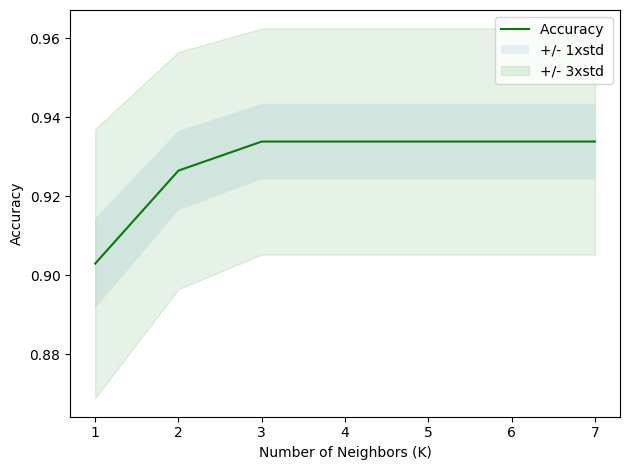

The best accuracy was with 0.9338235294117647 with k= 3


In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Number of different K values to try
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Loop through different values of K from 1 to 9
for n in range(1, Ks):
    # Initialize the KNeighborsClassifier with n_neighbors=n
    knn1 = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

    # Predict the test set labels
    yhat = knn1.predict(X_test)

    # Compute the accuracy for this value of K
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    # Compute the standard deviation of the accuracy
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# Plotting the results
plt.plot(range(1, Ks), mean_acc, 'g')  # Plot accuracy vs. number of neighbors
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Print the best accuracy and the corresponding K value
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### Parameter Tunning using Grid Search Cv

In [200]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
pow = [1,2]
param_grid = dict(n_neighbors=k_range,
                  weights=weight_options,
                  p = pow)
knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs,
                    param_grid,
                    cv=10,
                    scoring='accuracy')
grid_k.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [201]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)

Tuned Hyperparameters : {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.9410696952048145


In [203]:
knn1 = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = 'uniform')

In [204]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [205]:
yhat = knn1.predict(X_test)

In [206]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
a1 = jaccard_score(y_test,yhat,pos_label=1)
b1 = f1_score(y_test, yhat, average='weighted')
c1 = accuracy_score(y_test, yhat)
print('The jaccard_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(a1))
print('The F1-score of the KNN for k = 7 classifier on train data is {:.2f}'.format(b1))
print('The Accuracy_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(c1))

The jaccard_score of the KNN for k = 7 classifier on train data is 0.10
The F1-score of the KNN for k = 7 classifier on train data is 0.91
The Accuracy_score of the KNN for k = 7 classifier on train data is 0.93


## 2. Decision Tree

### Parameter Tuning For Decision tree to find best tree

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],

             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

### Find the best parameters

In [208]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}
Accuracy : 0.9410653916739108


In [209]:
Loan_Tree = grid_search.best_estimator_
print(Loan_Tree)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='sqrt', random_state=1024)


### Train the best model using Training Data

In [210]:
Loan_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='sqrt', random_state=1024)

In [211]:
predTree = Loan_Tree.predict(X_test)

In [212]:
a2 = jaccard_score(y_test, predTree,pos_label=1)
b2 = f1_score(y_test, predTree, average='weighted')
c2 = accuracy_score(y_test, predTree)
print("The accuraccy of (Loan_ tree) DecisionTrees's {:.2f} ".format(c2))
print('The jaccard_score of the (Loan_ tree) DecisionTrees classifier on train data is {:.2f}'.format(a2))
print('The F1-score of the (Loan_ tree) DecisionTrees classifier on train data is {:.2f}'.format(b2))

The accuraccy of (Loan_ tree) DecisionTrees's 0.93 
The jaccard_score of the (Loan_ tree) DecisionTrees classifier on train data is 0.10
The F1-score of the (Loan_ tree) DecisionTrees classifier on train data is 0.91


## 3. Support Vector Machine

### Parameter Tunning For SVM using GridSerachCV

In [213]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid_s = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_s.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [214]:
print("Tuned Hyperparameters :", grid_s.best_params_)
print("Accuracy :",grid_s.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Accuracy : 0.9410653916739108


In [215]:
svm = SVC(probability = True,C = 0.1, gamma=1, kernel='poly')
print(svm)

SVC(C=0.1, gamma=1, kernel='poly', probability=True)


In [216]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly', probability=True)

In [217]:
yhat_s = svm.predict(X_test)

In [218]:
a3 = jaccard_score(y_test, yhat_s,pos_label=1)
b3 = f1_score(y_test, yhat_s, average='weighted')
c3 = accuracy_score(y_test, yhat_s)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))
print('The jaccard_score of the SVM classifier on train data is {:.2f}'.format(a3))
print('The F1-score of the SVM classifier on train data is {:.2f}'.format(b3))
print('The accuracy-score of the SVM classifier on train data is {:.2f}'.format(c3))

The accuracy of the svm classifier on training data is 0.94 out of 1
The accuracy of the svm classifier on test data is 0.93 out of 1
The jaccard_score of the SVM classifier on train data is 0.10
The F1-score of the SVM classifier on train data is 0.91
The accuracy-score of the SVM classifier on train data is 0.93


## 4. Logistic Regression

### Parameter Tunning using Grid Serch CV

In [219]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)

C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [220]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9410696952048145


In [221]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [222]:
yhat_l = log_reg.predict(X_test)

In [223]:
a4 = jaccard_score(y_test, yhat_l,pos_label = 1)
b4 = f1_score(y_test, yhat_l, average='weighted')
c4 = accuracy_score(y_test, yhat_l)

print('The jaccard_score of the logistic regression classifier on train data is {:.2f}'.format(a4))
print('The F1-score of the logistic regression classifier on train data is {:.2f}'.format(b4))
print('The accuracy_score of the logistic regression classifier on train data is {:.2f}'.format(c4))


The jaccard_score of the logistic regression classifier on train data is 0.10
The F1-score of the logistic regression classifier on train data is 0.91
The accuracy_score of the logistic regression classifier on train data is 0.93


# Model Evaluation

In [224]:
result_df=pd.DataFrame({'Model':['KNN','Decision Tree','SVM','Logistic Regression'],
                    'Jaccard Score' : [a1,a2,a3,a4],
                    'F1 Score' : [b1,b2,b3,b4],
                    'Accuracy Score':[c1,c2,c3,c4]})

In [225]:
print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN            0.1  0.907892        0.933824
1        Decision Tree            0.1  0.907892        0.933824
2                  SVM            0.1  0.907892        0.933824
3  Logistic Regression            0.1  0.907892        0.933824


# Using K-fold Cross Validation

KNN: 0.941041 (0.023267)
DT: 0.941041 (0.023267)
SVM: 0.941041 (0.023267)
LR: 0.941041 (0.023267)


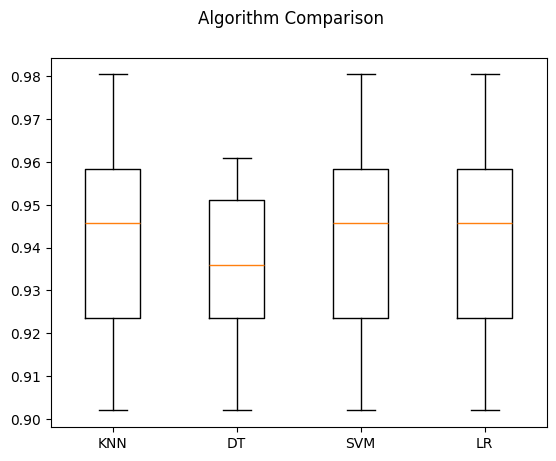

In [226]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT', Loan_Tree ))
models.append(('SVM', svm))
models.append(('LR', log_reg))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
  kfold = model_selection.KFold(n_splits=10,
                                random_state=seed,
                                shuffle=True)
  cv_results = model_selection.cross_val_score(model,
                                               X_train,
                                               y_train,
                                               cv=kfold,
                                               scoring=scoring)
  results.append(cv_results)
  names.append(name)
for name,model in models:
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ploting ROC_AUC Curve

In [227]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming X_train and y_train are your feature matrix and target vector respectively
# Assuming model is your trained classifier

result_table = pd.DataFrame(columns=['model', 'fpr', 'tpr', 'auc'])

for cls in models:
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = pd.concat([result_table, pd.DataFrame({'model': [cls.__class__.__name__],
                                                          'fpr': [fpr],
                                                          'tpr': [tpr],
                                                          'auc': [auc]})], ignore_index=True)

print(result_table)

   model                                                fpr  \
0  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
1  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
2  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
3  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   

                                                 tpr       auc  
0  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
1  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
2  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
3  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  


C:\Users\hrush\AppData\Local\Temp\ipykernel_14072\3905713082.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([result_table, pd.DataFrame({'model': [cls.__class__.__name__],


In [228]:
print(result_table)

   model                                                fpr  \
0  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
1  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
2  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   
3  tuple  [0.0, 0.0, 0.0, 0.026984126984126985, 0.061904...   

                                                 tpr       auc  
0  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
1  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
2  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  
3  [0.0, 0.08, 0.1, 0.32, 0.36, 0.36, 0.4, 0.74, ...  0.718175  


## Plot The Figure

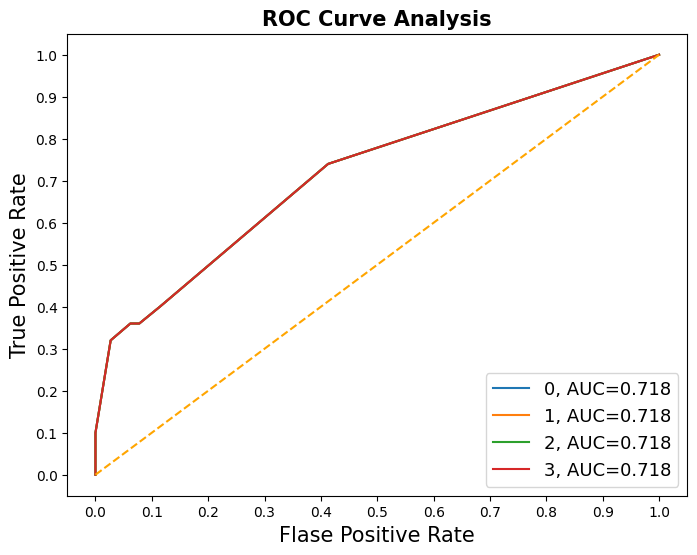

In [229]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### The Best Model : Support Vector Machine, Logistic Regression, KNN